In [11]:
import os
import subprocess
import re
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [12]:

ids = ["8_10", "16_6", "24_4", "32_3"]
result_path = 'result.txt'
edge_paths = ["data/" + "Out_OutGraph_Basketball_480_Slice16_Gop" + i + ".log" for i in ids]
weight_paths = ["data/" + "Out_SliceSize_Basketball_480_Slice16_Gop" + i + ".log" for i in ids]
checker_path = 'checker'

exe_paths = [
    # 'try_basic',
    # 'try_dfs_naive',
    'try_dfs2',
    'try_dfs3',
]
loss_probs = [10,20,30,40]
test_cases = [0,1,2,3]
test_loop_iterable = itertools.product(enumerate(exe_paths), enumerate(loss_probs), enumerate(test_cases))
rst = np.zeros((len(exe_paths), len(loss_probs), len(test_cases), 2))

## Run Test
for (i_exe, exe_path), (i_loss, loss_prob), (i_test, test_cases) in test_loop_iterable:
    if i_loss == 0 and i_test == 0:
        print('Testing method {}'.format(exe_path))
    if i_test == 0:
        print('Setting loss_prob = {}%'.format(loss_prob))
    print('Case {}'.format(i_test))
        
    args = [edge_paths[i_test], weight_paths[i_test], result_path, str(loss_prob)]
    result = subprocess.run([exe_path] + args,
                            stdout=subprocess.PIPE, stderr=subprocess.STDOUT, encoding='utf-8')
    print(result.stdout)
    result = subprocess.run([checker_path] + args, 
                            stdout=subprocess.PIPE, stderr=subprocess.STDOUT, encoding='utf-8')
    print(result.stdout)
    nums = re.findall(r'\d+', result.stdout)
    if len(nums) == 6:
        rst[i_exe, i_loss, i_test, 0] = int(nums[0]) / int(nums[2])
        rst[i_exe, i_loss, i_test, 1] = int(nums[3]) / int(nums[5])
    


Testing method try_dfs2
Setting loss_prob = 10%
Case 0
np = 7207, rst.size() = 10831

You get 56351 frames in mode 1(total frame numer=72000)
You get 71979 frames in mode 2(total frame numer=72000)

Case 1
np = 7071, rst.size() = 10632

You get 51550 frames in mode 1(total frame numer=86400)
You get 79783 frames in mode 2(total frame numer=86400)

Case 2
np = 6571, rst.size() = 9869

You get 46215 frames in mode 1(total frame numer=86400)
You get 86383 frames in mode 2(total frame numer=86400)

Case 3
np = 6357, rst.size() = 9537

You get 34918 frames in mode 1(total frame numer=86400)
You get 50861 frames in mode 2(total frame numer=86400)

Setting loss_prob = 20%
Case 0
np = 7207, rst.size() = 10831

You get 45306 frames in mode 1(total frame numer=72000)
You get 57894 frames in mode 2(total frame numer=72000)

Case 1
np = 7071, rst.size() = 10632

You get 40765 frames in mode 1(total frame numer=86400)
You get 75614 frames in mode 2(total frame numer=86400)

Case 2
np = 6571, rst.si

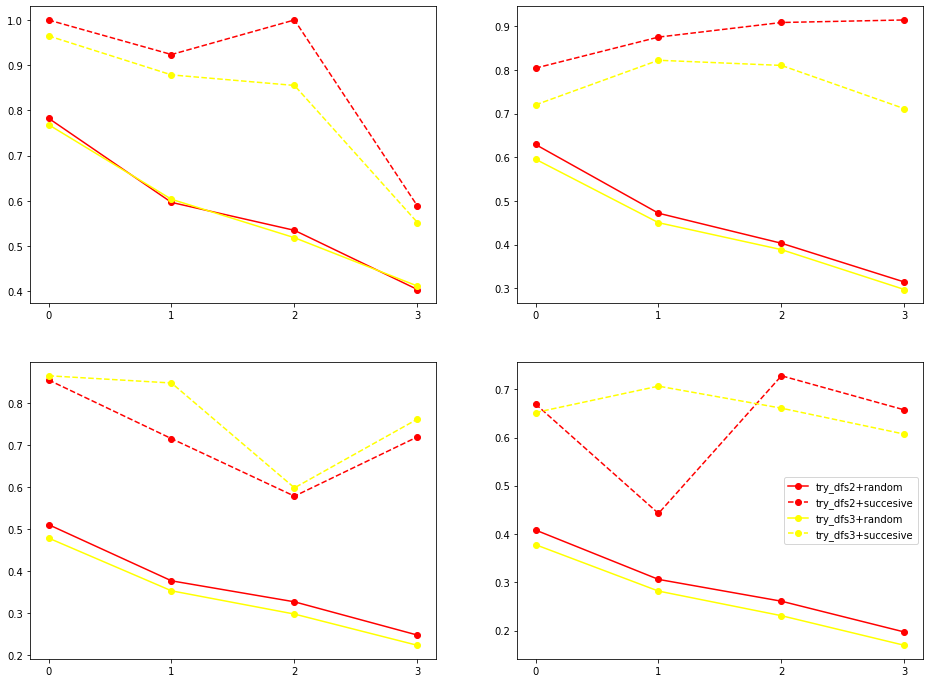

In [29]:
## Plot Result
colors = ['red', 'yellow', 'blue', 'green']

fig = plt.figure(figsize=(16,12))
for i_loss, loss_prob in enumerate(loss_probs):
    plt.subplot(2,2,i_loss+1)
    for i_exe, exe_path in enumerate(exe_paths):
        plt.plot(list('0123'), rst[i_exe, i_loss, :, 0], 
                 color=colors[i_exe], 
                 marker='o', 
                 label='+'.join([exe_path, 'random']))
        plt.plot(list('0123'), rst[i_exe, i_loss, :, 1], 
                 color=colors[i_exe], 
                 marker='o',
                 linestyle='dashed', 
                 label='+'.join([exe_path, 'succesive']))

plt.legend()
plt.show()
